In [1]:
#21BCE9243
#SRAVYA ELURI
import numpy as np  #numerical operations
import pandas as pd   #data manipulation
import os    #handling paths and fielnames
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install imutils  #image processing --resizing

from imutils import paths  #to retrieve the file paths of the images in the given directory
import matplotlib.pyplot as plt   #data visualization and plotting graphs
import argparse
import os
#tensorflow.keras --tensorflow implementation of the keras api -->building and training neural networks

#data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator   #data augamentation
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer   #binary class labels to one hot encoding
from sklearn.model_selection import train_test_split   #splitting the data

dataset = "/content/sample_data/covid19-chest-xray-image-dataset"

In [3]:
args={}   #dictionary
args["dataset"]=dataset

In [4]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  # image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]  # split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  # Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0   #data normalization
labels = np.array(labels)

In [5]:
import os

In [6]:
Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"

In [7]:
if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")

['.ipynb_checkpoints', 'normal', 'covid']


In [8]:
import os

Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))

In [9]:
import matplotlib.pyplot as plt
import cv2
import skimage  #image peocessing
from skimage.transform import resize
import numpy as np

Normal Chest X-ray Vs Covid-19 Chest X-ray


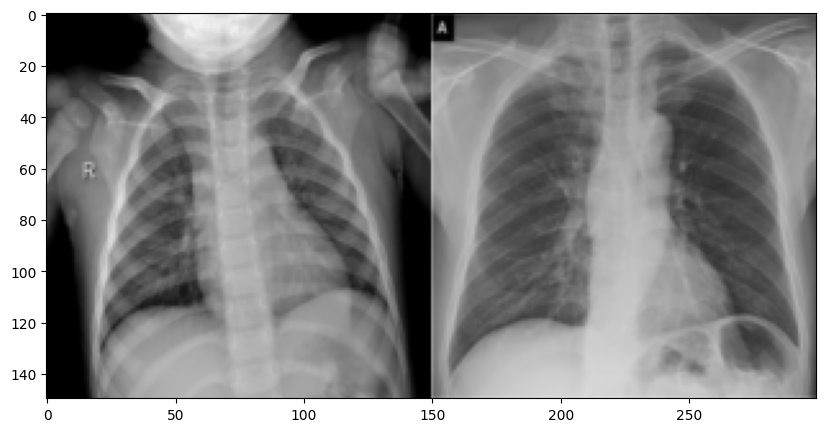

Normal Chest X-ray Vs Covid-19 Chest X-ray


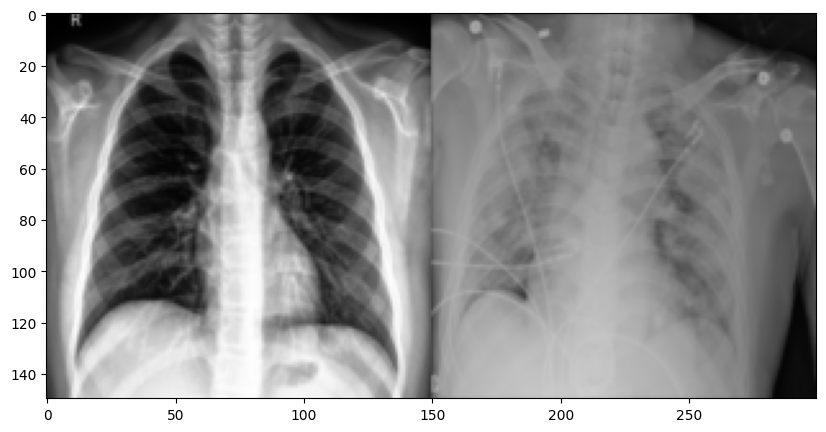

Normal Chest X-ray Vs Covid-19 Chest X-ray


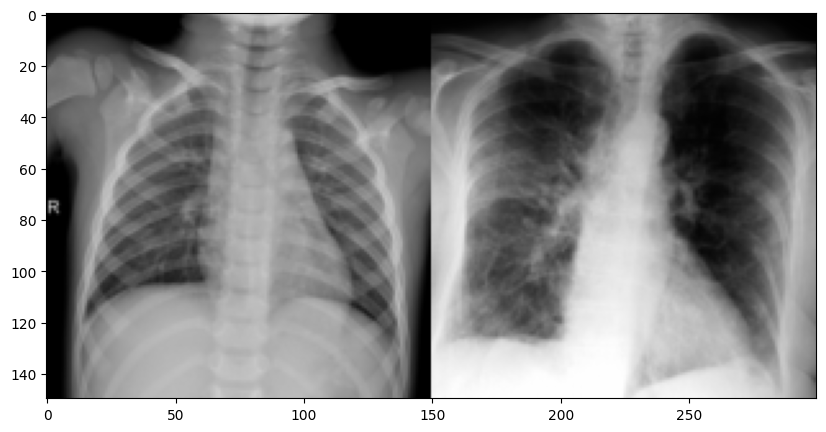

Normal Chest X-ray Vs Covid-19 Chest X-ray


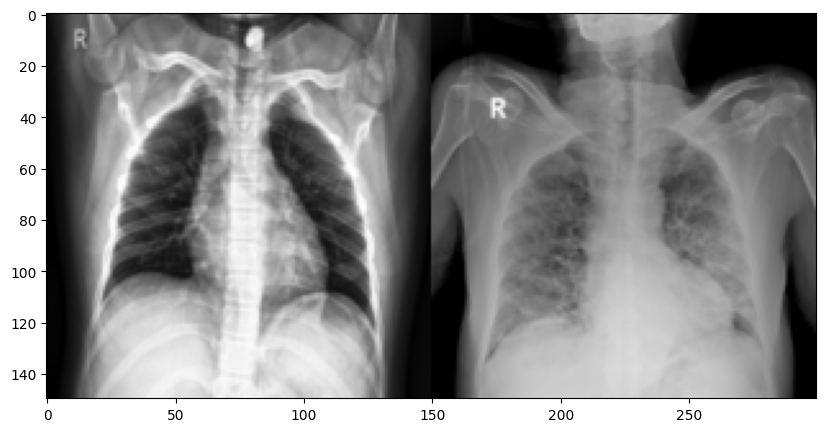

Normal Chest X-ray Vs Covid-19 Chest X-ray


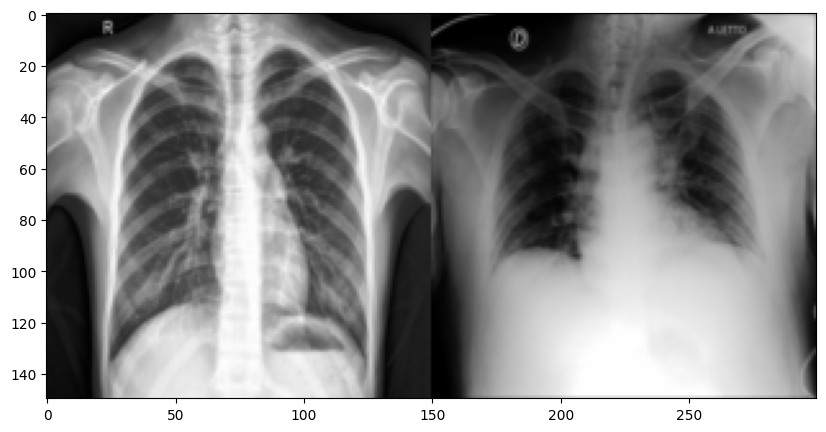

In [10]:
def plotter(i):     #plotter(i)--.display side-by-side
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = skimage.transform.resize(normal, (150, 150, 3))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode='reflect')

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)

In [11]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
                                                      test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((458, 224, 224, 3), (115, 224, 224, 3), (458, 2), (115, 2))

In [14]:
W_grid = 4  # width
L_grid = 4  # length
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))  # subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)  # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
history = model.fit(train_aug.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_test, Y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100)

Epoch 1/100
14/14 [==============================] - 17s 393ms/step - loss: 2.4825 - accuracy: 0.5044 - val_loss: 0.6548 - val_accuracy: 0.5043
Epoch 2/100
14/14 [==============================] - 5s 322ms/step - loss: 0.4863 - accuracy: 0.8210 - val_loss: 0.2044 - val_accuracy: 0.9130
Epoch 3/100
14/14 [==============================] - 6s 401ms/step - loss: 0.3534 - accuracy: 0.8734 - val_loss: 0.1747 - val_accuracy: 0.9130
Epoch 4/100
14/14 [==============================] - 5s 318ms/step - loss: 0.3281 - accuracy: 0.8624 - val_loss: 0.1642 - val_accuracy: 0.9304
Epoch 5/100
14/14 [==============================] - 6s 403ms/step - loss: 0.2853 - accuracy: 0.8755 - val_loss: 0.1145 - val_accuracy: 0.9739
Epoch 6/100
14/14 [==============================] - 5s 322ms/step - loss: 0.2482 - accuracy: 0.8974 - val_loss: 0.0817 - val_accuracy: 0.9739
Epoch 7/100
14/14 [==============================] - 5s 322ms/step - loss: 0.2284 - accuracy: 0.9258 - val_loss: 0.0824 - val_accuracy: 0.982

4/4 [==============================] - 0s 15ms/step


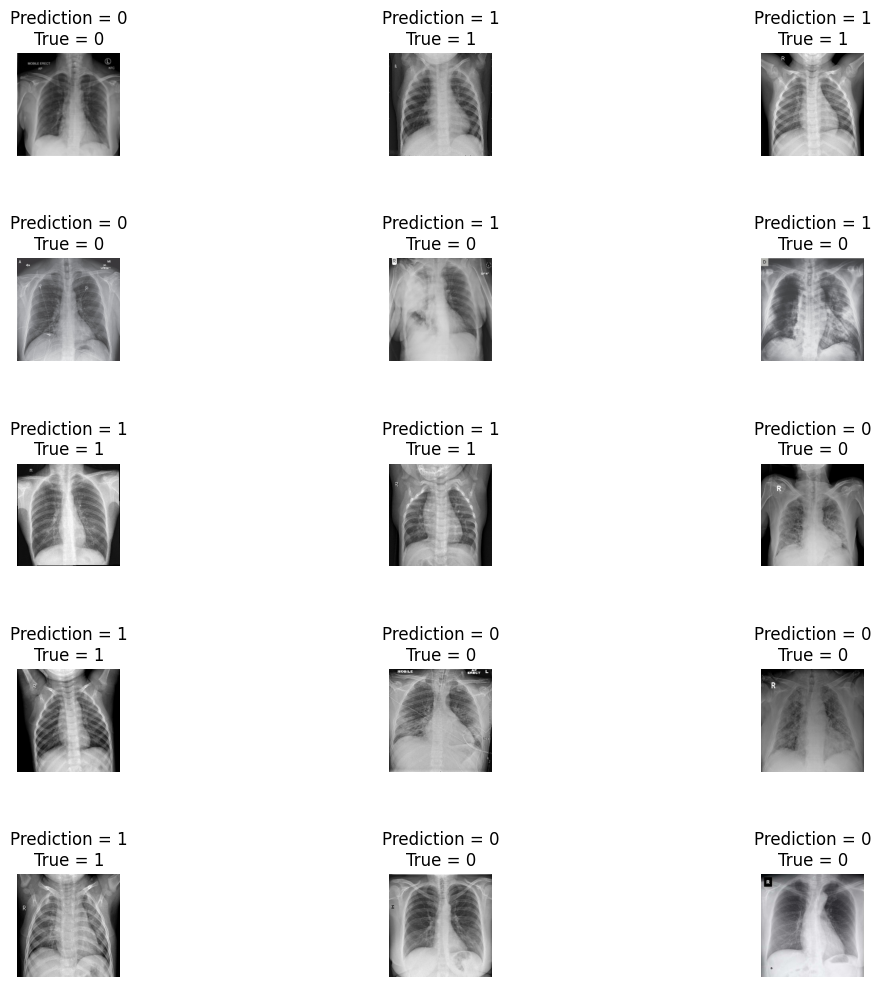

In [16]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=32)
num_samples = min(L * W, len(X_test))  # Use the minimum of L * W and number of samples in X_test
for i in range(num_samples):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)

In [17]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=32)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))

4/4 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

       covid       1.00      0.86      0.93        58
      normal       0.88      1.00      0.93        57

    accuracy                           0.93       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.93      0.93       115



In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)

0.9304347826086956

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))    #sensitivity-true positive rate
print("specificity: {:.4f}".format(specificity))    #specificity-true negative rate

[[50  8]
 [ 0 57]]
acc: 0.9304
sensitivity: 0.8621
specificity: 1.0000


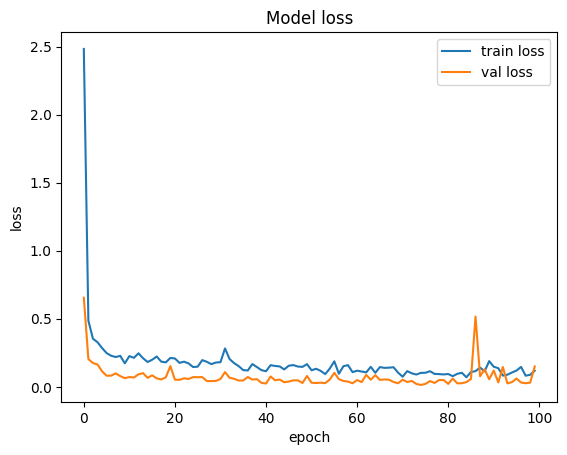

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

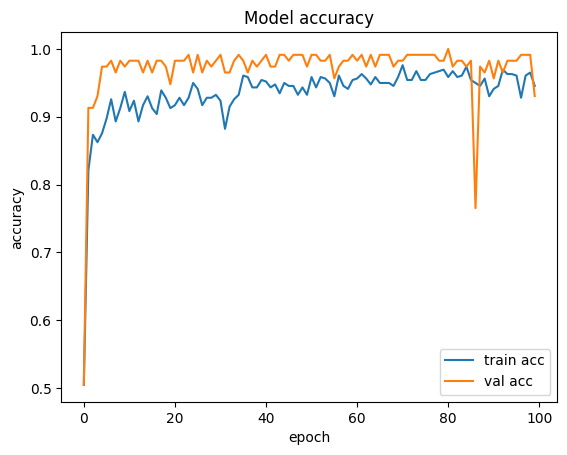

In [21]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
model.save('Covid_model.h5')

1/1 [==============================] - 0s 59ms/step
Prediction: covid


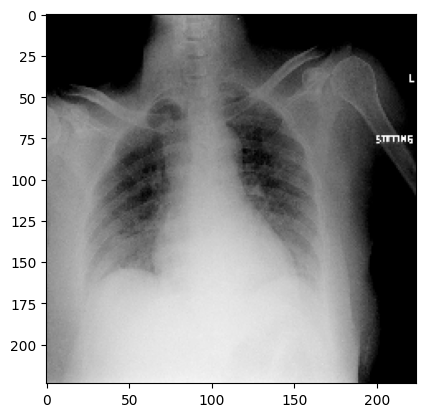

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img(
    '/content/sample_data/covid19-chest-xray-image-dataset/dataset/covid/covid-19-pneumonia-2.jpg',
    target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: covid')
else:
    print('Prediction: normal')

1/1 [==============================] - 0s 289ms/step
Prediction: normal


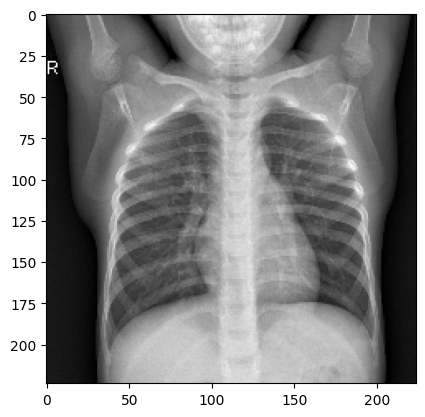

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img(
    '/content/sample_data/covid19-chest-xray-image-dataset/dataset/normal/IM-0225-0001.jpeg.jpg',
    target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: normal')
else:
    print('Prediction:covid')